<a href="https://colab.research.google.com/github/hpereira1/a/blob/main/LSTM_tides_floripa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
df_level = pd.read_csv('/content/SIMCOSTA_Imbituba_LEVEL_2017-03-29_2019-05-29.csv')
df_level

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,water_l1,avg_water_l1
0,2017,3,30,0,11,53,1230.05,NaN
1,2017,3,30,0,29,20,1230.07,NaN
2,2017,3,30,0,41,52,1228.42,NaN
3,2017,3,30,0,59,21,1233.43,NaN
4,2017,3,30,1,11,54,1226.17,NaN
...,...,...,...,...,...,...,...,...
55471,2019,5,30,1,48,12,1302.11,NaN
55472,2019,5,30,2,2,1,1305.68,NaN
55473,2019,5,30,2,18,22,1304.91,NaN
55474,2019,5,30,2,32,2,1308.23,NaN


In [38]:
#print(df_level.columns)
df_level['datetime'] = pd.to_datetime(df_level[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND']])
df_level.set_index('datetime', inplace=True)
df_level.drop(['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND'], axis=1, inplace=True)
df.sort_index(inplace=True)
df_level

,water_l1,avg_water_l1
datetime,,
2017-03-30 00:11:53,1230.05,NaN
2017-03-30 00:29:20,1230.07,NaN
2017-03-30 00:41:52,1228.42,NaN
2017-03-30 00:59:21,1233.43,NaN
2017-03-30 01:11:54,1226.17,NaN
...,...,...
2019-05-30 01:48:12,1302.11,NaN
2019-05-30 02:02:01,1305.68,NaN
2019-05-30 02:18:22,1304.91,NaN


In [35]:
df_met = pd.read_csv('/content/SIMCOSTA_Imbituba_MET_2017-03-29_2019-05-29.csv')
df_met

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,wind_speed,air_temp,relative_humidity,Avg_Dew_Point,atm_pressure,Avg_Air_Press,Avg_Wnd_Sp,Avg_Dew,Avg_Hmt,Avg_Air_Tmp,Avg_Wnd_Dir_N,wind_direction_N
0,2017,3,30,0,11,53,1.8,23.0,65,16.2,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,259.023
1,2017,3,30,0,29,20,1.5,23.6,65,16.6,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,336.023
2,2017,3,30,0,41,52,2.7,23.5,63,16.1,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,355.023
3,2017,3,30,0,59,21,1.6,23.6,63,16.1,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,322.023
4,2017,3,30,1,11,54,0.9,23.5,63,16.1,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,245.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55473,2019,5,30,1,48,12,1.7,20.3,0,-45.4,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,275.721
55474,2019,5,30,2,2,1,1.0,19.5,0,-45.9,1017.8,NaN,NaN,NaN,NaN,NaN,NaN,162.721
55475,2019,5,30,2,18,22,0.4,19.2,0,-46.1,1017.8,NaN,NaN,NaN,NaN,NaN,NaN,192.721
55476,2019,5,30,2,32,2,0.7,19.0,0,-46.2,1017.5,NaN,NaN,NaN,NaN,NaN,NaN,211.721


In [36]:
#print(df_met.columns)
df_met['datetime'] = pd.to_datetime(df_met[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND']])
df_met.set_index('datetime', inplace=True)
df_met.drop(['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND'], axis=1, inplace=True)
df_met.sort_index(inplace=True)
df_met

,wind_speed,air_temp,relative_humidity,Avg_Dew_Point,atm_pressure,Avg_Air_Press,Avg_Wnd_Sp,Avg_Dew,Avg_Hmt,Avg_Air_Tmp,Avg_Wnd_Dir_N,wind_direction_N
datetime,,,,,,,,,,,,
2017-03-30 00:11:53,1.8,23.0,65,16.2,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,259.023
2017-03-30 00:29:20,1.5,23.6,65,16.6,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,336.023
2017-03-30 00:41:52,2.7,23.5,63,16.1,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,355.023
2017-03-30 00:59:21,1.6,23.6,63,16.1,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,322.023
2017-03-30 01:11:54,0.9,23.5,63,16.1,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,245.023
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-30 01:48:12,1.7,20.3,0,-45.4,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,275.721
2019-05-30 02:02:01,1.0,19.5,0,-45.9,1017.8,NaN,NaN,NaN,NaN,NaN,NaN,162.721
2019-05-30 02:18:22,0.4,19.2,0,-46.1,1017.8,NaN,NaN,NaN,NaN,NaN,NaN,192.721


In [39]:
df = pd.merge(df_level, df_met, left_index=True, right_index=True)
df

,water_l1,avg_water_l1,wind_speed,air_temp,relative_humidity,Avg_Dew_Point,atm_pressure,Avg_Air_Press,Avg_Wnd_Sp,Avg_Dew,Avg_Hmt,Avg_Air_Tmp,Avg_Wnd_Dir_N,wind_direction_N
datetime,,,,,,,,,,,,,,
2017-03-30 00:11:53,1230.05,NaN,1.8,23.0,65,16.2,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,259.023
2017-03-30 00:29:20,1230.07,NaN,1.5,23.6,65,16.6,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,336.023
2017-03-30 00:41:52,1228.42,NaN,2.7,23.5,63,16.1,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,355.023
2017-03-30 00:59:21,1233.43,NaN,1.6,23.6,63,16.1,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,322.023
2017-03-30 01:11:54,1226.17,NaN,0.9,23.5,63,16.1,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,245.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-30 01:48:12,1302.11,NaN,1.7,20.3,0,-45.4,1018.2,NaN,NaN,NaN,NaN,NaN,NaN,275.721
2019-05-30 02:02:01,1305.68,NaN,1.0,19.5,0,-45.9,1017.8,NaN,NaN,NaN,NaN,NaN,NaN,162.721
2019-05-30 02:18:22,1304.91,NaN,0.4,19.2,0,-46.1,1017.8,NaN,NaN,NaN,NaN,NaN,NaN,192.721


In [50]:
required_cols  = ['water_l1',  'wind_speed',	'air_temp',	'relative_humidity',	'Avg_Dew_Point',	'atm_pressure',  'wind_direction_N']
df = df[required_cols]
df

,water_l1,wind_speed,air_temp,relative_humidity,Avg_Dew_Point,atm_pressure,wind_direction_N
datetime,,,,,,,
2017-03-30 00:11:53,1230.05,1.8,23.0,65,16.2,1018.2,259.023
2017-03-30 00:29:20,1230.07,1.5,23.6,65,16.6,1018.2,336.023
2017-03-30 00:41:52,1228.42,2.7,23.5,63,16.1,1018.2,355.023
2017-03-30 00:59:21,1233.43,1.6,23.6,63,16.1,1018.2,322.023
2017-03-30 01:11:54,1226.17,0.9,23.5,63,16.1,1018.2,245.023
...,...,...,...,...,...,...,...
2019-05-30 01:48:12,1302.11,1.7,20.3,0,-45.4,1018.2,275.721
2019-05-30 02:02:01,1305.68,1.0,19.5,0,-45.9,1017.8,162.721
2019-05-30 02:18:22,1304.91,0.4,19.2,0,-46.1,1017.8,192.721


In [51]:
df.isna().sum()
df = df.ffill()
df.isna().sum() #fill NaN val

,0
water_l1,0
wind_speed,0
air_temp,0
relative_humidity,0
Avg_Dew_Point,0
atm_pressure,0
wind_direction_N,0


In [52]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()   #normalizes from 0 to 1
scaled_data = scaler.fit_transform(df)  # normalized data
scaled_data2 = scaler.fit_transform(df)  # normalized data
# Define sequence length and features
sequence_length = 6  # Number of time steps in each sequence
num_features = len(df.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][0]  # 'T water_l1 column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.85 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (47149, 6, 7)
Train Y shape: (47149,)
Test X shape: (8321, 6, 7)
Test Y shape: (8321,)


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.15))#Dropout is a regularization technique that randomly "drops out" (sets to zero) 20% of the units during training to prevent overfitting. It forces the model to generalize better by not relying on specific neurons too heavily.

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.15))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.15))

# Add a dense output layer
model.add(Dense(units=1))
#This is a fully connected (dense) layer with 1 unit, which is the final output of the model. Since this is a regression task (predicting temperature), the output is a single continuous value (the predicted temperature).

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 6, 128)              │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 6, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,489 (513.63 KB)

 Trainable params: 131,489 (513.63 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/test/best_model_weights.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/100
590/590 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 0.0073 - val_loss: 0.0011
Epoch 2/100
590/590 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 0.0014 - val_loss: 7.3855e-04
Epoch 3/100
590/590 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - loss: 9.9746e-04 - val_loss: 4.2964e-04
Epoch 4/100
590/590 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 6.4339e-04 - val_loss: 4.2751e-04
Epoch 5/100
590/590 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - loss: 5.2449e-04 - val_loss: 3.8579e-04
Epoch 6/100
590/590 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - loss: 4.4317e-04 - val_loss: 6.2514e-04
Epoch 7/100
590/590 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 3.9433e-04 - val_loss: 3.2505e-04
Epoch 8/100
590/590 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - loss: 3.8013e-04 - val_loss: 3.1389e-04
Epoch 9/100
590/590 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 3.7871e-04 - val_loss: 3.1528e-04
Epoch 10/100
590/590 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - loss: 3.7390e-04 - val_loss: 3.4106e-04
Epoch 11/100
590/590 ━━━━━━━━━━━━━━━━━━━━

In [63]:

import tensorflow as tf
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model('/content/test/best_model_weights.keras')
test_loss = best_model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)

261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.0926e-04
Test Loss: 0.0002203960029873997


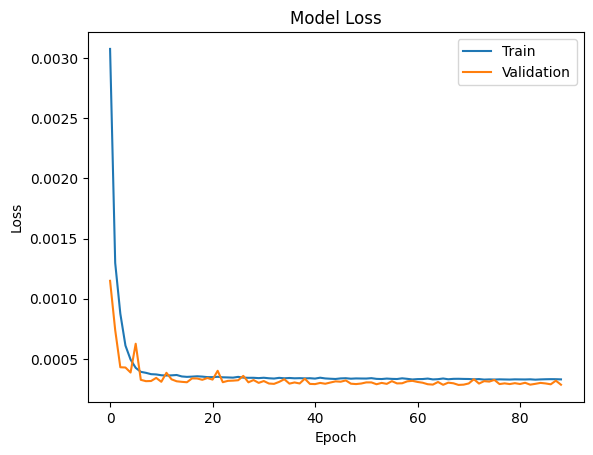

In [64]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have trained the model and have the 'best_model' object
# Also, 'test_x' and 'test_y' should be available

# Predict temperatures using the trained model
predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step
Mean Absolute Error (MAE): 0.011469732599116163
Mean Squared Error (MSE): 0.00022039603359130412
Root Mean Squared Error (RMSE): 0.014845741261092492


In [69]:
# y_true values
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_waterlvl = scaler.inverse_transform(test_y_copies)[:,0]

# predicted values
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, 7, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:,1]

261/261 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step




> Add blockquote



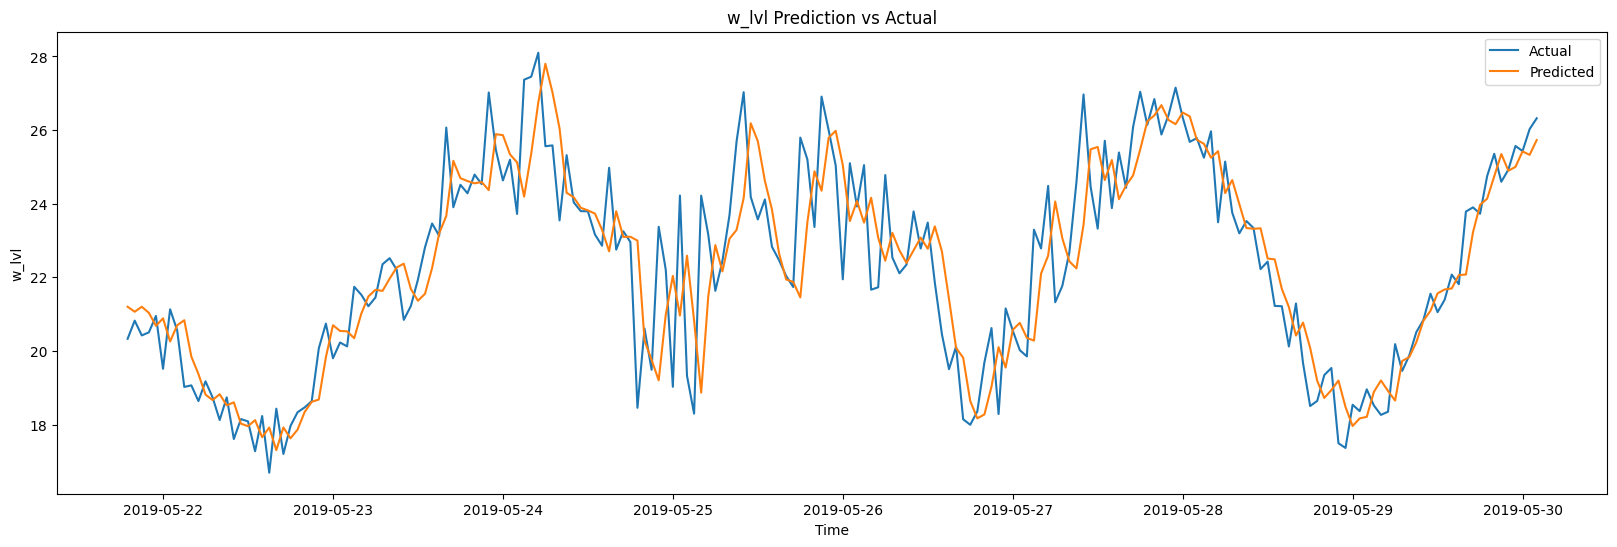

In [71]:
# Plotting predicted and actual temperatures
plt.figure(figsize=(20, 6))
plt.plot(df_final.index[-200:], true_temp[-200:], label='Actual')
plt.plot(df_final.index[-200:], predicted_temp[-200:], label='Predicted')
plt.title('w_lvl Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('w_lvl')
plt.legend()
plt.show()